#### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error 
#from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from math import sqrt

#### Load the dataset

In [2]:
df = pd.read_csv(r'F:\INTERNSHIPS\BHARAT INTERN\TASK 1\Dataset for Task 1\AAPL.csv')

#### Reading the dataset

In [3]:
# First 5 rows of dataset
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
# Last five rows of dataset
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [5]:
# Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


In [6]:
# Number of rows and columns of the dataset
df.shape

(1258, 15)

In [7]:
# Column names of the dataset
df.columns

Index(['Unnamed: 0', 'symbol', 'date', 'close', 'high', 'low', 'open',
       'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume',
       'divCash', 'splitFactor'],
      dtype='object')

In [8]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1258.0,6.285000e+02,3.632976e+02,0.000000e+00,3.142500e+02,6.285000e+02,9.427500e+02,1.257000e+03
close,1258.0,1.677240e+02,5.685080e+01,9.034000e+01,1.163275e+02,1.604850e+02,1.997850e+02,3.272000e+02
high,1258.0,1.692305e+02,5.750013e+01,9.167000e+01,1.174050e+02,1.620800e+02,2.012775e+02,3.278500e+02
low,1258.0,1.660398e+02,5.600677e+01,8.947000e+01,1.156025e+02,1.589742e+02,1.981700e+02,3.233500e+02
open,1258.0,1.675483e+02,5.661271e+01,9.000000e+01,1.164825e+02,1.603450e+02,1.995200e+02,3.247300e+02
volume,1258.0,3.500397e+07,1.729100e+07,1.136204e+07,2.359205e+07,3.064771e+07,4.100487e+07,1.622063e+08
adjClose,1258.0,1.626667e+02,5.873382e+01,8.495435e+01,1.094845e+02,1.547106e+02,1.969601e+02,3.263371e+02
adjHigh,1258.0,1.641311e+02,5.940284e+01,8.620506e+01,1.103936e+02,1.560919e+02,1.984284e+02,3.263571e+02
adjLow,1258.0,1.610280e+02,5.786925e+01,8.413622e+01,1.079625e+02,1.530543e+02,1.952816e+02,3.224973e+02
adjOpen,1258.0,1.624931e+02,5.849456e+01,8.463462e+01,1.091350e+02,1.544100e+02,1.964529e+02,3.238737e+02


In [9]:
# Use only the 'close' price for prediction
data = df['close'].values.reshape(-1, 1)

In [10]:
# Convert the 'date' column to datetime and sort by date
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')

In [11]:
# Set 'date' column as the index
df.set_index('date', inplace=True)

#### Normalize the data

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

#### Split the data into training and testing sets

In [13]:
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size, :], data[train_size:len(data), :]

#### Create a function to prepare data for LSTM

In [14]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#### Reshape input to be [samples, time steps, features]

In [15]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

#### Build the LSTM model

In [16]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

#### Train the model

In [17]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
841/841 - 6s - loss: 0.0212 - 6s/epoch - 7ms/step
Epoch 2/100
841/841 - 3s - loss: 0.0079 - 3s/epoch - 3ms/step
Epoch 3/100
841/841 - 3s - loss: 0.0012 - 3s/epoch - 3ms/step
Epoch 4/100
841/841 - 3s - loss: 9.4594e-05 - 3s/epoch - 3ms/step
Epoch 5/100
841/841 - 3s - loss: 8.5135e-05 - 3s/epoch - 4ms/step
Epoch 6/100
841/841 - 3s - loss: 8.5091e-05 - 3s/epoch - 3ms/step
Epoch 7/100
841/841 - 3s - loss: 8.4526e-05 - 3s/epoch - 4ms/step
Epoch 8/100
841/841 - 5s - loss: 8.2210e-05 - 5s/epoch - 6ms/step
Epoch 9/100
841/841 - 3s - loss: 8.2127e-05 - 3s/epoch - 4ms/step
Epoch 10/100
841/841 - 3s - loss: 8.0174e-05 - 3s/epoch - 3ms/step
Epoch 11/100
841/841 - 3s - loss: 8.4680e-05 - 3s/epoch - 3ms/step
Epoch 12/100
841/841 - 3s - loss: 7.9134e-05 - 3s/epoch - 3ms/step
Epoch 13/100
841/841 - 3s - loss: 8.0917e-05 - 3s/epoch - 4ms/step
Epoch 14/100
841/841 - 3s - loss: 8.0198e-05 - 3s/epoch - 4ms/step
Epoch 15/100
841/841 - 3s - loss: 8.2820e-05 - 3s/epoch - 3ms/step
Epoch 16/100
841

#### Make predictions

In [18]:
trainPredict = model.predict(trainX)

27/27 [==============================] - 1s 3ms/step


In [19]:
testPredict = model.predict(testX)

13/13 [==============================] - 0s 3ms/step


#### Create and fit the scaler

In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data)

MinMaxScaler()

#### Scale the data

In [21]:
scaled_data = scaler.transform(data)

#### Inverse transform to get back to the original scale

In [22]:
original_data = scaler.inverse_transform(scaled_data)

In [23]:
print("_"*50)
print("Original Data:")
print("_"*50)
print(data)

__________________________________________________
Original Data:
__________________________________________________
[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [24]:
print("_"*50)
print("Scaled Data:")
print("_"*50)
print(scaled_data)

__________________________________________________
Scaled Data:
__________________________________________________
[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [25]:
print("_"*50)
print("Original Data after Inverse Transform:")
print("_"*50)
print(original_data)

__________________________________________________
Original Data after Inverse Transform:
__________________________________________________
[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [26]:
trainY = trainY.reshape(-1, 1)

In [27]:
testY = testY.reshape(-1,1)

#### Calculate the RMSE (Root Mean Squared Error)

In [28]:
trainScore = sqrt(mean_squared_error(trainY, trainPredict))
print("Train RMSE :")
print("_"*40)
print("Train RMSE: %.2f" % trainScore)
print("_"*40)

Train RMSE :
________________________________________
Train RMSE: 0.01
________________________________________


In [29]:
testScore = sqrt(mean_squared_error(testY, testPredict))

print("Test RMSE:")
print("_" * 40)
print("Test RMSE: %.2f" % testScore)
print("_" * 40)

Test RMSE:
________________________________________
Test RMSE: 0.05
________________________________________


#### Plot the results

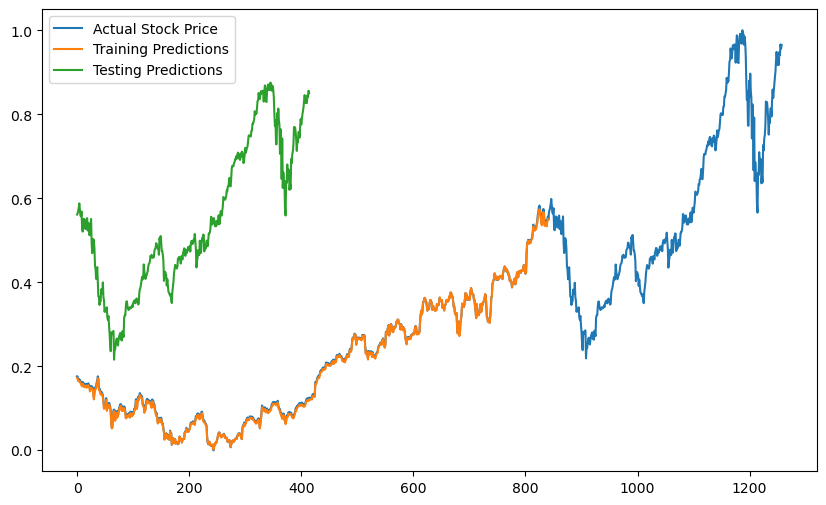

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(data), label='Actual Stock Price')
plt.plot(trainPredict, label='Training Predictions')
plt.plot(testPredict, label='Testing Predictions')
plt.legend()
plt.show()

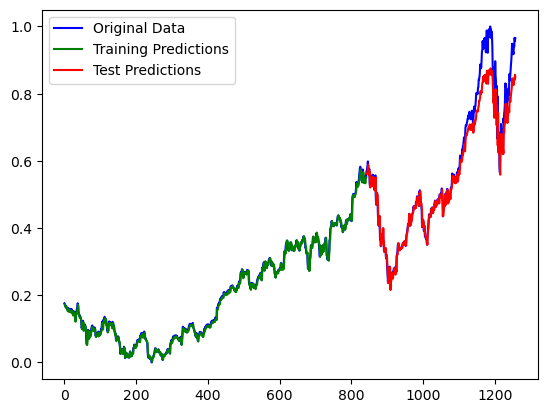

In [31]:
import matplotlib.pyplot as plt

# Plot the original data
plt.plot(scaler.inverse_transform(data), label='Original Data', color='b')

# Plot the training predictions
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict
plt.plot(trainPredictPlot, label='Training Predictions', color='g')

# Plot the test predictions
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2):len(trainPredict) + (look_back * 2) + len(testPredict), :] = testPredict
plt.plot(testPredictPlot, label='Test Predictions', color='r')

plt.legend()
plt.show()

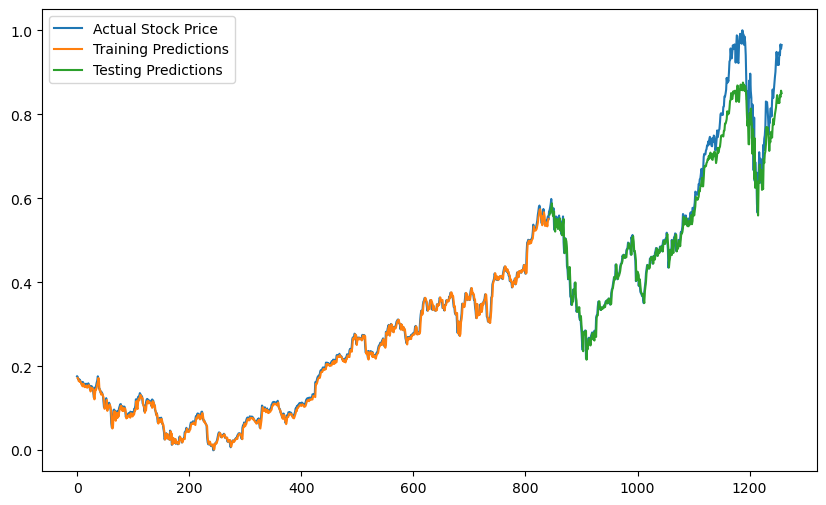

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(data), label='Actual Stock Price')
plt.plot(trainPredictPlot, label='Training Predictions')
plt.plot(testPredictPlot, label='Testing Predictions')
plt.legend()
plt.show()